In [1]:
!pip3 install --upgrade pip

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pip in ./.local/lib/python3.5/site-packages (20.2.4)


In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration 4').getOrCreate()

In [3]:
df = spark.read.load("./cardio_train.csv", format="csv", header="true")

In [4]:
df.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|    71|  110|   70

###### 2.2 Describe data

In [5]:
# count number of rows
df.count()

70000

In [6]:
# attributes
df.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [7]:
len(df.columns)

13

###### 2.3 Explore data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pdf = pd.read_csv("./cardio_train.csv")

Text(0.5,1,'Graph I')

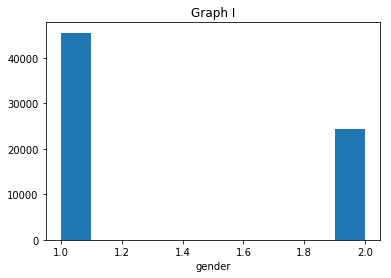

In [9]:
plt.hist(pdf["gender"])
plt.xlabel('gender')
plt.title('Graph I')

Text(0.5,1,'Graph II')

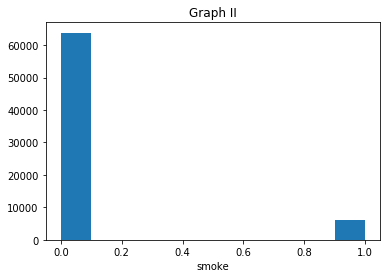

In [10]:
plt.hist(pdf["smoke"])
plt.xlabel('smoke')
plt.title('Graph II')

Text(0.5,1,'Graph III')

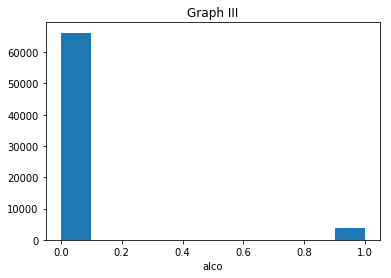

In [11]:
plt.hist(pdf["alco"])
plt.xlabel('alco')
plt.title('Graph III')

Text(0.5,1,'Graph IV')

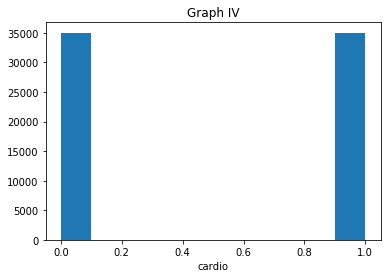

In [12]:
plt.hist(pdf["cardio"])
plt.xlabel('cardio')
plt.title('Graph IV')

In [13]:
!pip3 install seaborn

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


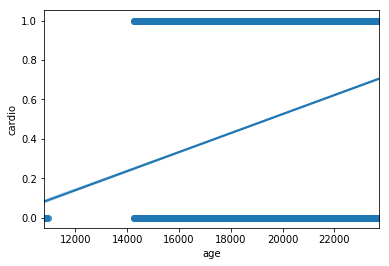

In [14]:
import numpy as np
import seaborn as sns

sns.regplot(x="age", y="cardio", data=pdf)

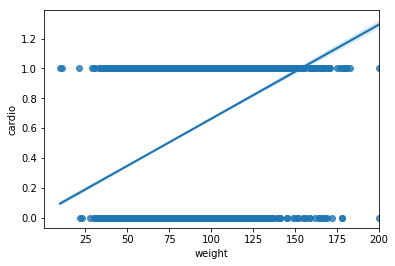

In [15]:
sns.regplot(x="weight", y="cardio", data=pdf)

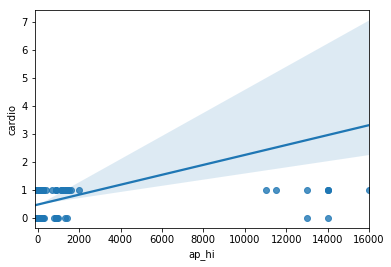

In [16]:
sns.regplot(x="ap_hi", y="cardio", data=pdf)

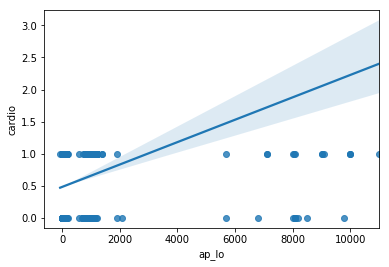

In [17]:
sns.regplot(x="ap_lo", y="cardio", data=pdf)

###### 2.4 Verify the data quality

In [18]:
# Count number of missing Value
df.na.drop().count()

70000

In [19]:
# Measurement errors
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: string (nullable = true)
 |-- weight: string (nullable = true)
 |-- ap_hi: string (nullable = true)
 |-- ap_lo: string (nullable = true)
 |-- cholesterol: string (nullable = true)
 |-- gluc: string (nullable = true)
 |-- smoke: string (nullable = true)
 |-- alco: string (nullable = true)
 |-- active: string (nullable = true)
 |-- cardio: string (nullable = true)



In [20]:
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType)

data_schema = [StructField('id',IntegerType(),True),
              StructField('age',IntegerType(),True),
              StructField('gender',IntegerType(),True),
              StructField('height',IntegerType(),True),
              StructField('weight',FloatType(),True),
              StructField('ap_hi',IntegerType(),True),
              StructField('ap_lo',IntegerType(),True),
              StructField('cholesterol',IntegerType(),True),
              StructField('gluc',IntegerType(),True),
              StructField('smoke',IntegerType(),True),
              StructField('alco',IntegerType(),True),
              StructField('active',IntegerType(),True),
              StructField('cardio',IntegerType(),True)]

final_struct = StructType(fields=data_schema)

df = spark.read.load("./cardio_train.csv", format="csv", header="true", schema=final_struct)

df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: float (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [21]:
# Data errors
print(df.filter((df['ap_hi']<=0) | (df['ap_lo']<=0)).count())
df.filter((df['ap_hi']<=0) | (df['ap_lo']<=0)).select('ap_hi', 'ap_lo').show()

29
+-----+-----+
|ap_hi|ap_lo|
+-----+-----+
|  906|    0|
| -100|   80|
|  130|    0|
| -115|   70|
|  138|    0|
|  138|    0|
| -100|   70|
|  149|    0|
|  906|    0|
| -140|   90|
| -120|   80|
|   12|    0|
|  140|    0|
|  907|    0|
| -150|   80|
|  148|    0|
|  309|    0|
|  806|    0|
|  906|    0|
|  108|    0|
+-----+-----+
only showing top 20 rows



In [22]:
print(df.filter(df['ap_lo'] > df['ap_hi']).count())
df.filter(df['ap_lo'] > df['ap_hi']).select('ap_hi', 'ap_lo').show()

1234
+-----+-----+
|ap_hi|ap_lo|
+-----+-----+
|  160| 1100|
|  160| 1000|
|  140|  800|
|  160| 1000|
|  140| 1000|
|  150| 1033|
|  120|  150|
|  200| 1000|
|   14|   90|
|  140| 1000|
|   70|  110|
|  190| 1100|
|  180| 1000|
|  140| 1000|
|  150| 1100|
|   14|   90|
|   11|   80|
|  160| 1000|
|  150| 1001|
|  140| 1000|
+-----+-----+
only showing top 20 rows

